In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import csv
import xml.etree.ElementTree as ET
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys, os
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *

from data_manager import *
from metadata import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for Local Macbook Pro


In [3]:
from annotation_utilities import *
from registration_utilities import *
from conversion import *

In [4]:
STACY_DATA_ROOTDIR = '/home/yuncong/stacy_data'

In [5]:
# stack = 'RV9_53hrs' # Not used
# stack = 'RV19_61hrs'
# stack = 'RV13_64hrs'
# stack = 'RV14_65hrs'
stack = 'RV4_67hrs'
xmlfile = os.path.join(STACY_DATA_ROOTDIR, '%s.xml' % stack)
download_from_s3(xmlfile)

In [6]:
# create element tree object
tree = ET.parse(xmlfile)

# get root element
root = tree.getroot()

prefix = '{http://www.mbfbioscience.com/2007/neurolucida}'

# Stacy data
neurolucida_name_map = \
{"IO": 'IO_L',
"LRT": 'LRt_L',
"BRAINSTEM": 'Brainstem',
'5 MOTOR': '5N_L',
 '7n': '7n_L',
'AMB MOTOR': 'Amb_L',
'FACIAL MOTOR': '7N_L',
 'SpVC': 'Sp5C_L',
 'SpVO': 'Sp5O_L',
 'Sp5I': 'Sp5I_L',
 'Pr5': 'Pr5_L',
 'Sol': 'Sol_L',
 'Li': 'Li_L',
#  'SpVIO': 'unknown',
'R LrT': 'LRt_R',
'R FN':  '7N_R',
'R_7n': '7n_R',
'R 5N':  '5N_R',
'R SpVC': 'Sp5C_R',
'R Sp5I': 'Sp5I_R',
'R SpVO': 'Sp5O_R',
'R Pr5':  'Pr5_R',
'R IO':  'IO_R',
 'R-SpVI':  'Sp5I_R',
'R-SpV':  'Sp5_R',
'R-SpVO':  'Sp5O_R',
 'R-PrV':  'Pr5_R',
 'R-Amb':  'Amb_R',
#  'R SpVIO':  'unknown',
 'SpVC_R':  'Sp5C_R',
 'R 5M':  '5N_R',
#  'User Line 5':  'unknown',
#  'NewContour': 'unknown',
#   'User Line 2':  'unknown',
}

In [7]:
contours = defaultdict(list)

for item in root.findall(prefix+'contour'):
    name = item.attrib['name']
    if name not in neurolucida_name_map:
#         raise Exception('Name %s in stack %s not recognized' % (name, stack))
        sys.stderr.write('Name %s in stack %s not recognized. Ignored.\n' % (name, stack))
        continue
    name = neurolucida_name_map[name]
    curr_contour = []
#     try:
#         resolution = float(item.findall(prefix+'resolution')[0].text)
#         print resolution
#     except:
#         pass
    for p in item.findall(prefix+'point'):
        curr_contour.append((float(p.attrib['x']), float(p.attrib['y']), float(p.attrib['z'])))
    contours[name].append(np.array(curr_contour))
    
contours.default_factory = None

In [71]:
marker_name_map = {'Marker 13': "All",
                  'Marker 17': 'All',
                  'Marker 8': 'All',
                  'Marker 9': 'All',
                  'Marker 11': 'All',
                  'Marker 45': 'All'}

In [72]:
# markers = defaultdict(list)
markers = {}
# name = 'All'

for item in root.findall(prefix+'marker'):
    name = item.attrib['name']
    
    curr_markers = []
    for p in item.findall(prefix+'point'):
        curr_markers.append((float(p.attrib['x']), float(p.attrib['y']), float(p.attrib['z'])))
        
    if marker_name_map[name] in markers:
        markers[marker_name_map[name]] = np.vstack([markers[marker_name_map[name]], np.array(curr_markers)])
    else:
        markers[marker_name_map[name]] = np.array(curr_markers)
    
# markers.default_factory = None

In [73]:
# contour coordinates are in um already.

In [74]:
contour_colors = dict(zip(contours.keys(), np.array(random_colors(len(contours)))/255.))

In [75]:
marker_colors = dict(zip(markers.keys(), np.array(random_colors(len(markers)))/255.))

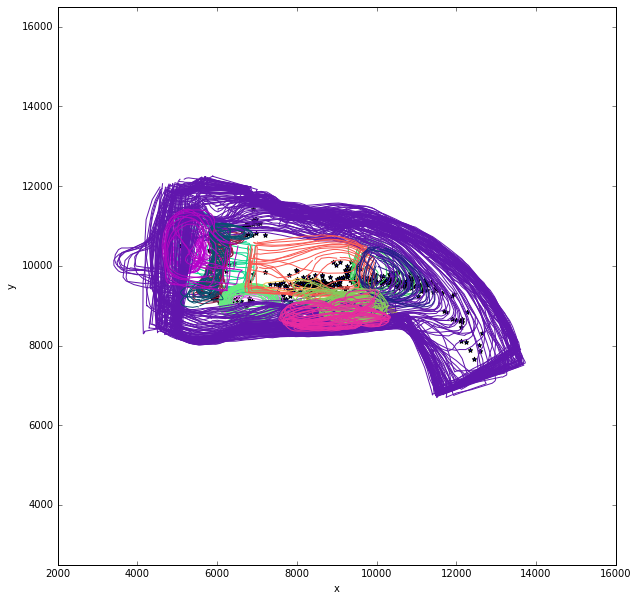

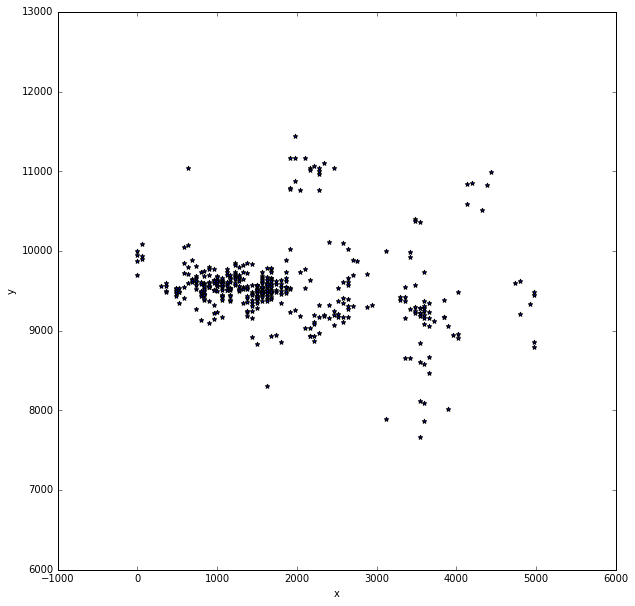

In [76]:
# plt.figure(figsize=(10, 10));

# for name, cnts in contours.iteritems():    
# #     print name
# #     if parse_label(name)[1] == 'L' and \
# #     (parse_label(name)[0] == '5N' or parse_label(name)[0] == '7N'  or parse_label(name)[0] == '7n' or parse_label(name)[0] == 'Sp5C'):
# #     if parse_label(name)[0] == '7N':
#     for cnt in cnts:
#         plt.plot(cnt[:, 2], cnt[:, 1], c=contour_colors[name]);
# plt.axis('equal');
# plt.xlabel('x');
# plt.ylabel('z');

##############################
            
plt.figure(figsize=(10, 10));
for name, cnts in contours.iteritems():    
#     if parse_label(name)[1] == 'L' and \
#     (parse_label(name)[0] == '5N' or parse_label(name)[0] == '7N'  or parse_label(name)[0] == '7n' or parse_label(name)[0] == 'Sp5C'):
#     if parse_label(name)[0] == '7N':
    for cnt in cnts:
        plt.plot(cnt[:, 0], cnt[:, 1], c=contour_colors[name]);
    
plt.scatter(markers['All'][:,0], markers['All'][:,1], s=20, marker='*')

# for name, mkrs in markers.iteritems():
#     plt.scatter(mkrs[:, 0], mkrs[:, 1], c=marker_colors[name], s=1, zorder=9);

plt.xlabel('x');
plt.ylabel('y');
plt.axis('equal');
# plt.legend();

##############################

plt.figure(figsize=(10, 10));
for name, cnts in contours.iteritems():    
#     if parse_label(name)[1] == 'L' and \
#     (parse_label(name)[0] == '5N' or parse_label(name)[0] == '7N'  or parse_label(name)[0] == '7n' or parse_label(name)[0] == 'Sp5C'):
#     if parse_label(name)[0] == '7N':
    if name == 'All':
        for cnt in cnts:
            plt.plot(cnt[:, 2], cnt[:, 1], c=contour_colors[name]);
    
plt.scatter(markers['All'][:,2], markers['All'][:,1], s=20, marker='*')

# for name, mkrs in markers.iteritems():
#     plt.scatter(mkrs[:, 0], mkrs[:, 1], c=marker_colors[name], s=1, zorder=9);

plt.xlabel('x');
plt.ylabel('y');
plt.axis('equal');
# plt.legend();

In [77]:
structure_subset = \
[name for name in contours.keys() if parse_label(name)[0] in all_known_structures] \
+ ['Brainstem']
print structure_subset

['LRt_R', '7N_R', 'Sp5C_L', '7n_R', '5N_R', '5N_L', '7N_L', '7n_L', 'Sp5I_R', 'Sp5C_R', 'Amb_L', 'LRt_L', 'Brainstem']


In [78]:
downscale = 32

In [79]:
# Stacy's data; sagittal

# stack = 'RV4_67hrs', x=front to back; y= down to up; z= left to right.
# rest: x=back to front; y= down to up; z= left to right.

In [80]:
if stack == 'RV4_67hrs' or stack == 'RV19_61hrs' or stack == 'RV9_53hrs':

    markers_orientationCorrected = {name_u: mkrs3d*[1,-1,1]
                           for name_u, mkrs3d in markers.iteritems()}

else:
    markers_orientationCorrected = {name_u: mkrs3d*[-1,-1,1]
                       for name_u, mkrs3d in markers.iteritems()}

markers_atlasResol = {name: mkrs3d / (XY_PIXEL_DISTANCE_LOSSLESS * downscale)
                       for name, mkrs3d in markers_orientationCorrected.iteritems()
#                      if name in structure_subset
                     }

In [81]:
if stack == 'RV4_67hrs' or stack == 'RV19_61hrs' or stack == 'RV9_53hrs':
    contours_orientationCorrected = {name_u: [cnt*[1,-1,1]
                                     for cnt in cnts3d if len(cnt) > 2] 
                           for name_u, cnts3d in contours.iteritems()}
else:
    contours_orientationCorrected = {name_u: [cnt*[-1,-1,1]
                                     for cnt in cnts3d] 
                           for name_u, cnts3d in contours.iteritems()}
    
contours_atlasResol = {name: [cnt / (XY_PIXEL_DISTANCE_LOSSLESS * downscale)
                                for cnt in cnts3d] 
                       for name, cnts3d in contours_orientationCorrected.iteritems()
                                            if name in structure_subset}

# Convert brainstem outline to volumes

In [82]:
outline_volume, outline_volume_bbox = \
interpolate_contours_to_volume(contours_xyz=contours_atlasResol['Brainstem'], 
                                                                 interpolation_direction='z', fill=True)

In [83]:
# display_volume_sections(outline_volume)

In [84]:
# vertices, faces = volume_to_polydata(outline_volume, num_simplify_iter=0, smooth=True, return_mesh=True)

In [85]:
# import pymesh
# vertices2, faces2, info = pymesh.collapse_short_edges_raw(vertices, faces, abs_threshold=100)
# mesh2 = mesh_to_polydata(vertices2, faces2, num_simplify_iter=0, smooth=True)

In [86]:
# polydata = mesh_to_polydata(vertices, faces, num_simplify_iter=0, smooth=True)

In [87]:
# This is teriibly slow./..

# deci = vtk.vtkQuadricDecimation()
# deci.SetInputData(polydata)

# deci.SetTargetReduction(0.9)
# # 0.8 means each iteration causes the point number to drop to 20% the original

# deci.Update()

# polydata = deci.GetOutput()

In [88]:
vol_fp = DataManager.get_score_volume_filepath(stack=stack, structure='Brainstem', downscale=32, volume_type='annotationAsScore')
create_parent_dir_if_not_exists(vol_fp)
bp.pack_ndarray_file(outline_volume, vol_fp)
upload_to_s3(vol_fp)

bbox_fp = DataManager.get_score_volume_bbox_filepath(stack=stack, structure='Brainstem', detector_id=None, prep_id=None, downscale=32, volume_type='annotationAsScore')
create_parent_dir_if_not_exists(bbox_fp)
np.savetxt(bbox_fp, outline_volume_bbox)
upload_to_s3(bbox_fp)

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/RV19_61hrs/RV19_61hrs_down32_annotationAsScoreVolume/score_volumes/RV19_61hrs_down32_annotationAsScoreVolume_Brainstem.bp" "s3://mousebrainatlas-data/CSHL_volumes/RV19_61hrs/RV19_61hrs_down32_annotationAsScoreVolume/score_volumes/RV19_61hrs_down32_annotationAsScoreVolume_Brainstem.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/RV19_61hrs/RV19_61hrs_down32_annotationAsScoreVolume/score_volumes/RV19_61hrs_down32_annotationAsScoreVolume_Brainstem_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/RV19_61hrs/RV19_61hrs_down32_annotationAsScoreVolume/score_volumes/RV19_61hrs_down32_annotationAsScoreVolume_Brainstem_bbox.txt"


# Convert contours to volumes

In [20]:
valid_level = .5

surround_distance_um = 200
surround_distance_voxel = surround_distance_um / XY_PIXEL_DISTANCE_TB
print "surround size (in voxels):", surround_distance_voxel

surround size (in voxels): 13.5869565217


In [21]:
vol_bbox_dict = {}
for name, cnts3d in contours_atlasResol.iteritems():

    vol_bbox_dict[name] = interpolate_contours_to_volume(interpolation_direction='z',
                                                    contours_xyz=cnts3d, 
                                                    len_interval=20)
    
    surr_name = convert_to_surround_name(name, margin=surround_distance_um)    
    vol_bbox_dict[surr_name] = get_surround_volume_v2(vol_bbox_dict[name][0], vol_bbox_dict[name][1], 
                                                      valid_level=valid_level, distance=surround_distance_voxel, 
                                                      prob=True)

In [22]:
def save_vol_bboxes(vol_bbox_dict=vol_bbox_dict):
    """
    Args:
        vol_bbox_dict (dict {str: (3d-array, (6,)-array)}): bbox is (xmin,xmax,ymin,.ymax,zmin,zmax), end points inclusive
    """
    
    for s, (vol, bbox) in vol_bbox_dict.iteritems():
        
        vol_fp = DataManager.get_score_volume_filepath(stack=stack, structure=s, downscale=32, volume_type='annotationAsScore')
        create_parent_dir_if_not_exists(vol_fp)
        bp.pack_ndarray_file(vol, vol_fp)
        upload_to_s3(vol_fp)

        bbox_fp = DataManager.get_score_volume_bbox_filepath(stack=stack, structure=s, detector_id=None, prep_id=None, downscale=32, volume_type='annotationAsScore')
        create_parent_dir_if_not_exists(bbox_fp)
        np.savetxt(bbox_fp, bbox)
        upload_to_s3(bbox_fp)

In [23]:
save_vol_bboxes(vol_bbox_dict=vol_bbox_dict)

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_LRt_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_LRt_R.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_LRt_R_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_LRt_R_bbox.txt"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_Sp5C_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_Sp5C_L.bp"
aws s3 cp "

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_Sp5O_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_Sp5O_L.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_Sp5O_L_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_Sp5O_L_bbox.txt"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_Sp5I_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_Sp5I_

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_7n_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_7n_R.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_7n_R_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_7n_R_bbox.txt"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_5N_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/RV4_67hrs/RV4_67hrs_down32_annotationAsScoreVolume/score_volumes/RV4_67hrs_down32_annotationAsScoreVolume_5N_L_surround_2

In [24]:
# volumes, volume_bbox = convert_vol_bbox_dict_to_overall_vol(vol_bbox_dict=vol_bbox_dict)

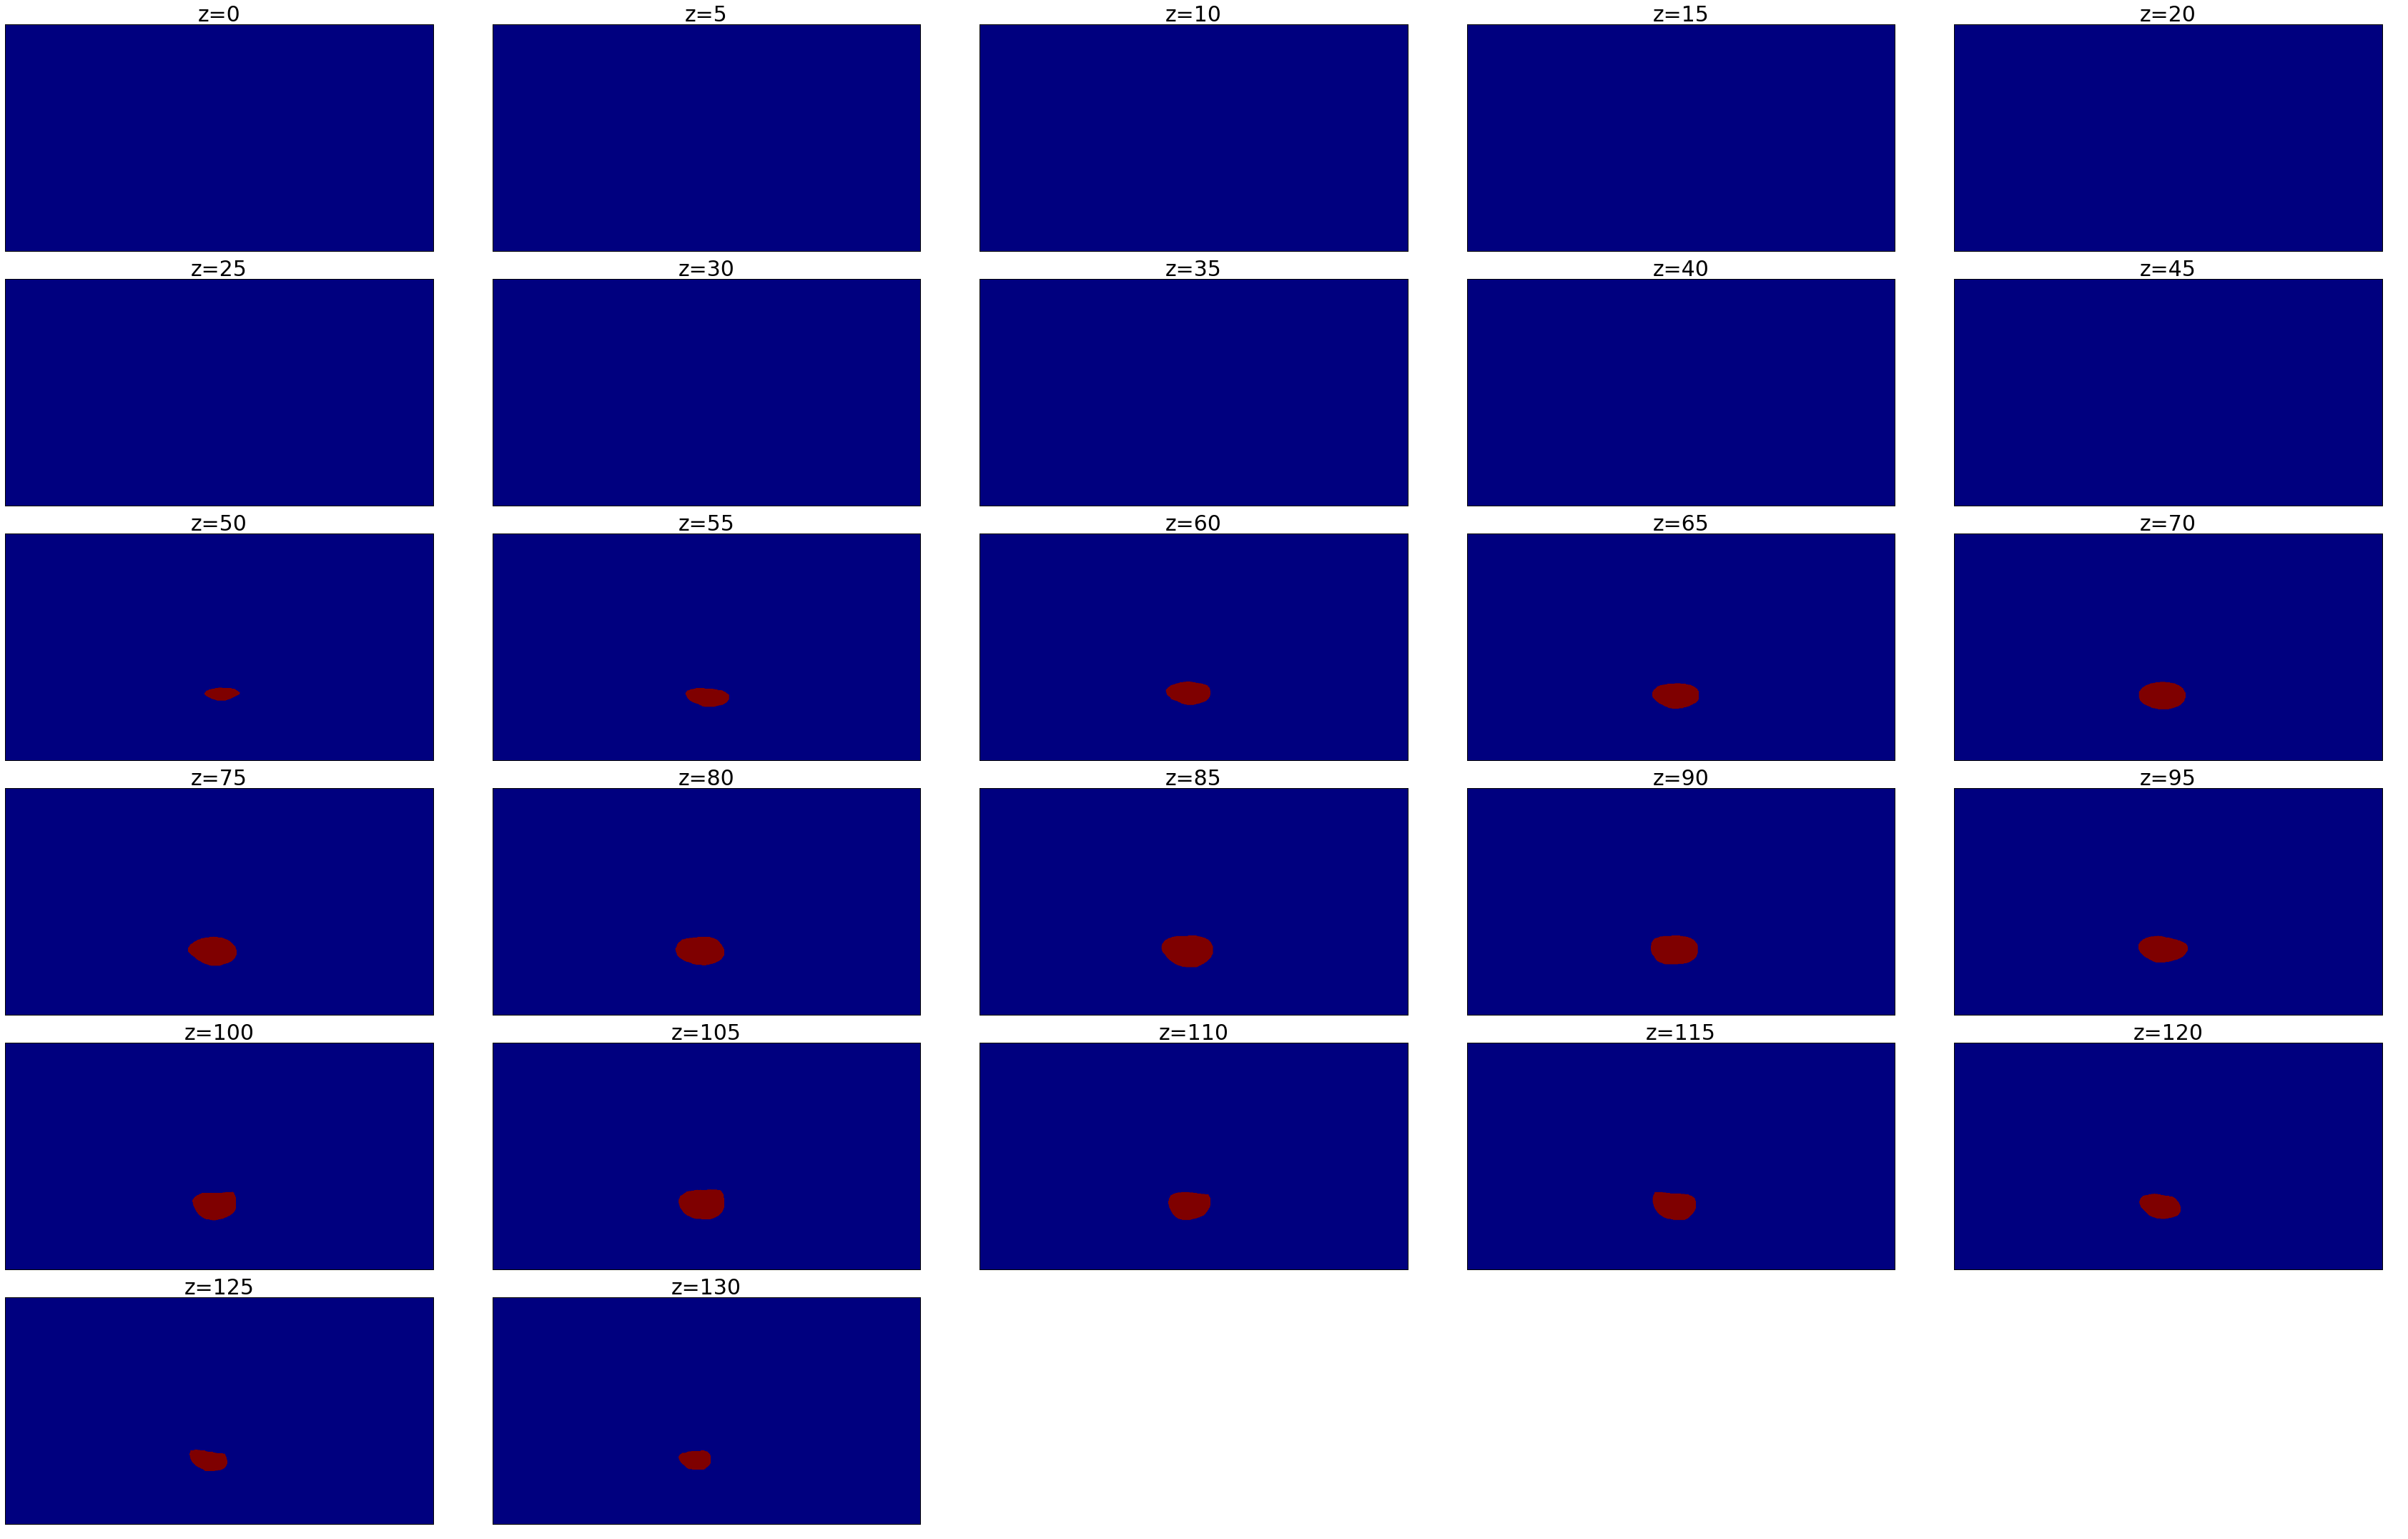

In [25]:
# display_volume_sections(volumes['7N_L'], start_level=0)

In [26]:
# for s in volumes.keys():
#     vol_fp = DataManager.get_score_volume_filepath(stack=stack, structure=s, downscale=32, volume_type='annotationAsScore')
#     create_parent_dir_if_not_exists(vol_fp)
#     bp.pack_ndarray_file(volumes[s], vol_fp)
#     upload_to_s3(vol_fp)
    
#     bbox_fp = DataManager.get_score_volume_bbox_filepath(stack=stack, structure=s, detector_id=None, prep_id=None, downscale=32, volume_type='annotationAsScore')
#     create_parent_dir_if_not_exists(bbox_fp)
#     np.savetxt(bbox_fp, volume_bbox)
#     upload_to_s3(bbox_fp)

In [96]:
# outline

# outline_volume_wrt_overallVolumeOrigin = crop_and_pad_volume(outline_volume, 
#                                                              in_bbox=outline_volume_bbox_rel2cropped, 
#                                                              out_bbox=volume_bbox)

In [30]:
# vol_fp = DataManager.get_score_volume_filepath(stack=stack, structure='Brainstem', downscale=32, volume_type='annotationAsScore')
# create_parent_dir_if_not_exists(vol_fp)
# bp.pack_ndarray_file(outline_volume_wrt_overallVolumeOrigin, vol_fp)
# upload_to_s3(vol_fp)

# bbox_fp = DataManager.get_score_volume_bbox_filepath(stack=stack, structure='Brainstem', detector_id=None, prep_id=None, downscale=32, volume_type='annotationAsScore')
# create_parent_dir_if_not_exists(bbox_fp)
# np.savetxt(bbox_fp, volume_bbox)
# upload_to_s3(bbox_fp)

# For marker data

In [143]:
for name, mkrs in markers_atlasResol.iteritems():
    markers_fp = DataManager.get_stacy_markers_filepath(stack=stack, structure=name)
    create_parent_dir_if_not_exists(markers_fp)
    bp.pack_ndarray_file(markers_atlasResol[name], markers_fp)
    upload_to_s3(markers_fp)

aws s3 cp "/home/yuncong/stacy_data/markers/RV4_67hrs/RV4_67hrs_markers_All.bp" "s3://mousebrainatlas-data/stacy_data/markers/RV4_67hrs/RV4_67hrs_markers_All.bp"
